# Assignement 4: Becoming an independent Data Scientist

_By Sebastien Callebaut_

## 1. Region and Domain

__State the region and domain category that your data sets are about.__

* __Region:__ Brussels, Brussels Capital, Belgium
* __Domain category:__ Visitor arrivals and hotel occupancy rates

## 2. Research question

__You must state a question about the domain category and region that you identified as being interesting.__

How have the number of visitor arrivals in Brussels impacted the occupancy rates of hotels over the last 5 years?


## 3. Links

__You must provide at least two links to publicly accessible datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.__

* http://opendatastore.brussels/dataset/f03544a1-a01c-4374-b19d-e93697f1ac73/resource/cd8ad6a4-ce20-4ce6-9ba5-50323144d096/download/historique-marches-prios.xlsx

* http://opendatastore.brussels/dataset/e083a504-7ce9-4f76-b0b7-0e64b8469c3b/resource/5407e011-09f9-4adf-ad68-c83eba751806/download/hotels_evol_clean.csv

## 4. Image

__You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo’s principles of truthfulness, functionality, beauty, and insightfulness.__

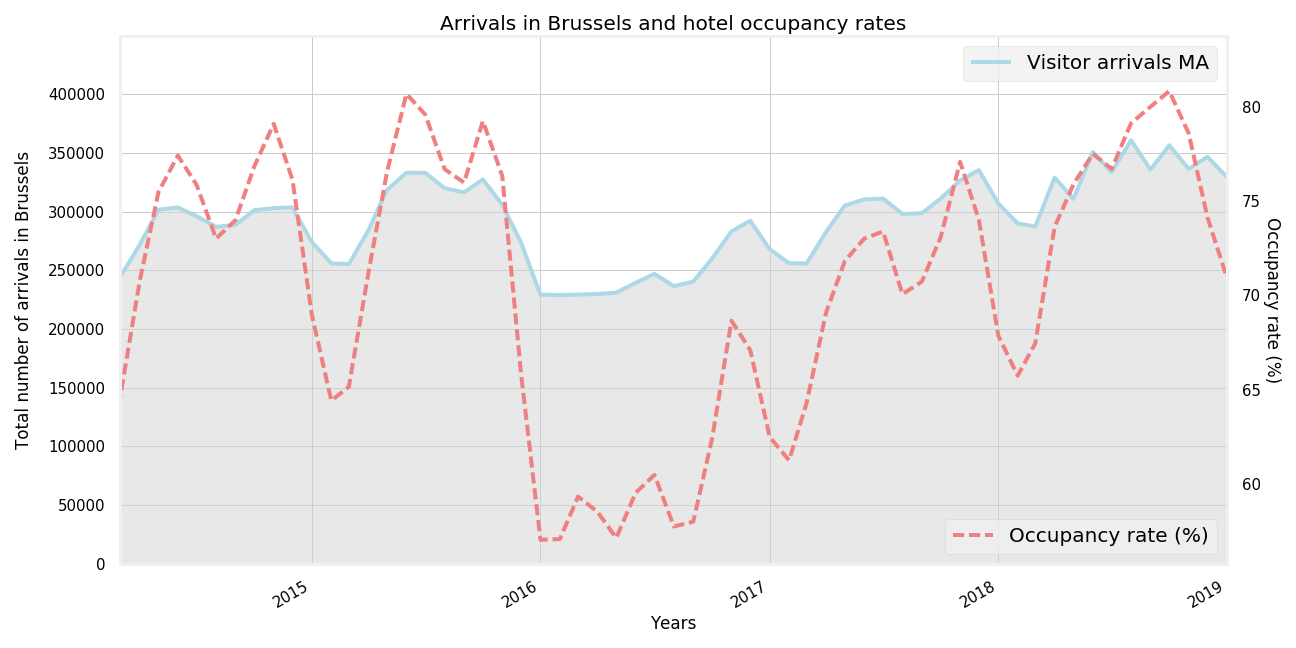

In [90]:
Image(filename = "arrivals.png")

## 5. Discussion

__You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.__

* This visualization addresses the issue whether an increase in visitor arrivals in Brussels (Belgium) translates into an increase in hotel occupancy rate over the last 5 years. The data was retrieved from the Brussels Open Datastore. The data was filtered so to only work with the number of visitor arrivals per month and the average occupancy rate of all hotels in Brussels per month. A 3 months moving average was taken in order to dim the seasonal impact of tourist arrivals.


* The plot indicates that hotel occupancy is closely linked to the number of tourist arrivals in Brussels. However, one can note the disconnect that happened at the end of 2015 where the number of arrivals did not translate into hotel occupancy. This needs to be further analyzed. A search on the _Hotel Occupancy in Brussels in 2015_ indicates the following:


* _"2015 was a special year for the Brussels Tourism Observatory. For the first 10 months of the year, Brussels' tourism figures were initially positive. The number of visitors and hotel occupancy rates were systematically higher than those of 2014. Then came the tragic events at the end of the year: first the terror attacks in Paris, followed by the lockdown in Brussels."_


* Our analysis can thus conclude that despite a high number of arrivals in Brussels during the 2015 - 2016 period, this did not translate into hotel occupancy.

## 6. Supporting code

Please find hereunder the code supporting my research.

### 6.1 Arrivals by activity type

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from IPython.display import Image

# Open the dataset with the number of nights at hotels
hotel_nights = pd.read_excel("historique-marches-prios.xlsx", sheet_name = "Night", skiprows=1)

# Rename cols and clean table
hotel_nights = hotel_nights.rename(columns={"By reason of stay": "Date"}).set_index("Date").drop('TOTG - Total général')
hotel_nights = hotel_nights[:4]

# Change the "M" in the column with just a "-" and transpose the frame
hotel_nights = hotel_nights.rename(columns = lambda x: x.replace("M", "-")).T

# Change index to datetime and set frequency equal to month
hotel_nights.index = pd.to_datetime(hotel_nights.index).to_period('M')

# Set rolling average
hotel_nights['All - rolling'] = hotel_nights["All"].rolling(window=3).mean()

### 6.2 Performance of hotels

In [92]:
# Load the data
hotel_perf = pd.read_csv("hotelsperf.csv", sep = ";",decimal = ",").set_index("Date", drop = True)

# Change index to datetime and set frequency equal to month
hotel_perf.index = pd.to_datetime(hotel_perf.index, format='%d-%m-%Y').to_period('M')

# Clean the file
hotel_perf = hotel_perf[(hotel_perf["Classement"] == 'All') & (hotel_perf["Quartier"] == 'All')]
hotel_perf = hotel_perf["Occupancy rate"].astype(float)*(100)
hotel_perf = hotel_perf.to_frame().rename(columns = {"Occupancy rate":"Occupancy rate (%)"})

# Set rolling average
hotel_perf['Occupancy rate (%)'] = hotel_perf["Occupancy rate (%)"].rolling(window=3).mean()

### 6.3 Merge the frames

In [93]:
hotel_nights = pd.merge(hotel_nights, hotel_perf, left_index=True, right_index=True, how = "inner")
hotel_nights.head(10)

,All,Leisure,Meetings,Other Business Reason,All - rolling,Occupancy rate (%)
2014-01,219696,102215,83860,33621,NaN,67.497223
2014-02,229749,105118,93065,31566,NaN,63.503454
2014-03,283747,127501,116655,39591,244397.333333,64.628165
2014-04,301183,150828,108545,41810,271559.666667,70.747075
2014-05,319688,150999,124066,44623,301539.333333,75.482942
2014-06,289617,132395,115802,41420,303496.000000,77.414865
2014-07,278761,154471,91845,32445,296022.000000,75.860438
2014-08,292535,178612,80474,33449,286971.000000,73.013190
2014-09,294545,132115,118522,43908,288613.666667,73.996194
2014-10,316342,141828,130473,44041,301140.666667,76.838199


### 6.4 Plot the data

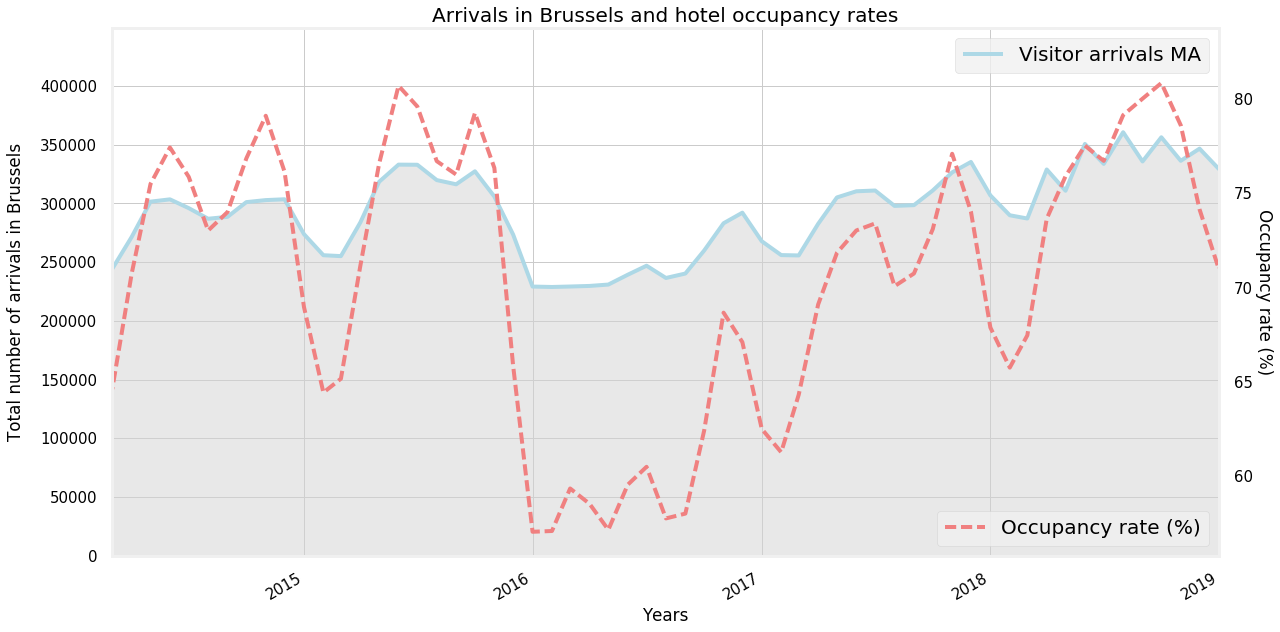

In [94]:
# Data for the years
years_data = np.arange(np.datetime64("2014-01"), np.datetime64("2020-01"), np.timedelta64(1, 'M'), dtype='datetime64[M]').astype('datetime64[M]')

# Set the years for the major and minor ticks
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Create plots
fig, ax = plt.subplots(figsize =  (18, 9))

# Create first axis for hotel activity
#ax.plot(years_data, hotel_nights['All'], color='lightblue', linestyle='solid',label = "Visitor arrivals")
ax.plot(years_data, hotel_nights['All - rolling'], color='lightblue', linestyle='solid',label = "Visitor arrivals MA")
ax.set_ylabel("Total number of arrivals in Brussels", labelpad = 15)
ax.legend(prop={'size': 20})
ax.set_facecolor('white')
ax.set_ylim(bottom=0)
ax.set_ylim(top=(max(hotel_nights['All']) + 0.2*max(hotel_nights['All'] )))
ax.tick_params(axis='both', which='major', pad=15, labelsize=15)

# Add second data points with other y frame
ax1 = ax.twinx()
ax1.set_ylabel("Occupancy rate (%)", labelpad = 20 , rotation=270)
ax1.plot(years_data, hotel_nights['Occupancy rate (%)'], color='lightcoral', linestyle='dashed')
ax1.tick_params(axis='y')
ax1.tick_params(axis='both', which='major', pad=15, labelsize=15)

# Add labels
ax.set_xlabel("Years")

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# Round to nearest years
datemin = np.datetime64(hotel_nights.index[2], 'M')
datemax = np.datetime64(hotel_nights.index[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax-1)

# Format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)
ax1.grid(False)
ax1.set_facecolor('white')

# Overall background color
fig.patch.set_facecolor('white')

# Add title
ax.set_title("Arrivals in Brussels and hotel occupancy rates")

# Rotates and right aligns the x labels, and moves the bottom of the axes up to make room for them
fig.autofmt_xdate()

# Show the legend
ax1.legend(loc=4, prop={'size': 20})

# Fill in between
y1 = np.array(hotel_nights['All - rolling'], dtype=float)
y2 = np.array(hotel_nights['Occupancy rate (%)'].astype(float), dtype=float)
ax.fill_between( years_data, y1, y2, color='lightgray', alpha='0.5')

# Style to use
plt.style.use("fivethirtyeight")
plt.tight_layout()

# Save the figure
fig.savefig('arrivals.png', dpi=plt.gcf().dpi, facecolor='w', edgecolor='w')

# Show the plot
plt.show();